In [65]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

In [66]:
df = pd.read_csv("./dataset/features.csv")
df.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing,personality
0,2.0,-75.1,4.1,931.7,15.0,Agreeableness
1,-11.0,9.6,15.3,486.2,22.0,Agreeableness
2,18.0,-2.3,1.0,112.8,1.0,Agreeableness
3,6.0,-4.0,-1.1,30.6,1.0,Agreeableness
4,-6.0,0.0,2.2,152.9,9.0,Agreeableness


In [67]:
classes = df.personality.unique()
classes

array(['Agreeableness', 'Conscientiousness', 'Extraversion',
       'Neuroticism', 'Openness'], dtype=object)

In [68]:
target = {
    target_class: key
    for key, target_class in enumerate(classes)
}
target

{'Agreeableness': 0,
 'Conscientiousness': 1,
 'Extraversion': 2,
 'Neuroticism': 3,
 'Openness': 4}

In [69]:
df.personality = df.personality.map(target)

In [70]:
df.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing,personality
0,2.0,-75.1,4.1,931.7,15.0,0
1,-11.0,9.6,15.3,486.2,22.0,0
2,18.0,-2.3,1.0,112.8,1.0,0
3,6.0,-4.0,-1.1,30.6,1.0,0
4,-6.0,0.0,2.2,152.9,9.0,0


In [71]:
y = df.personality
x = df.drop('personality', axis=1)

In [72]:
x.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing
0,2.0,-75.1,4.1,931.7,15.0
1,-11.0,9.6,15.3,486.2,22.0
2,18.0,-2.3,1.0,112.8,1.0
3,6.0,-4.0,-1.1,30.6,1.0
4,-6.0,0.0,2.2,152.9,9.0


In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: personality, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

In [75]:
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,629
Trainable params: 2,629
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
epoch = 100
history = model.fit(x_train, y_train, epochs=epoch, batch_size=16, verbose=0)

In [78]:
model.evaluate(x_train, y_train)

7/7 [==============================] - 0s 4ms/step - loss: 1.7608 - accuracy: 0.5606


[1.7607685327529907, 0.560606062412262]

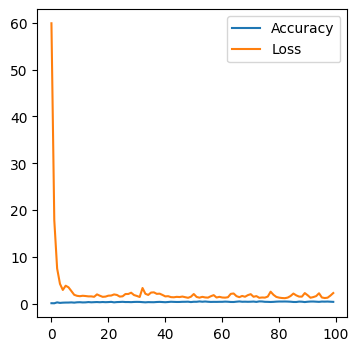

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.plot(range(epoch), history.history['accuracy'], label="Accuracy")
plt.plot(range(epoch), history.history['loss'], label="Loss")
plt.legend(loc="best")
plt.show()

In [80]:
model.predict(np.array([x_test.iloc[1].tolist()]))

1/1 [==============================] - 0s 86ms/step


array([[0.03410239, 0.20075181, 0.00227635, 0.00291457, 0.75995487]],
      dtype=float32)